#Importing Libraries

In [1]:
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Flatten
from keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy

#Extracting Dataset

In [ ]:
!unzip /content/drive/MyDrive/FruitClassification/Fruits_Vegetables.zip -d /content/fruits_data

#Initializing Object of ImageDataGenerator

In [3]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, zoom_range=[0.8, 1.2],
                             horizontal_flip=True,vertical_flip=True)

#Providing Paths

In [4]:
train_path = "/content/fruits_data/Fruits_Vegetables/train"
test_path = "/content/fruits_data/Fruits_Vegetables/test"
validation_path = "/content/fruits_data/Fruits_Vegetables/validation"

#Utilizing flow from directory method

In [5]:
train_data = datagen.flow_from_directory(train_path, target_size=(229,229), shuffle=True, class_mode='categorical')
test_data = datagen.flow_from_directory(test_path, target_size=(299,299), shuffle=True, class_mode='categorical')
val_data = datagen.flow_from_directory(validation_path, target_size=(229,229), shuffle=True, class_mode='categorical' )

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


#Testing VGG16

In [17]:
from keras.applications.vgg16 import VGG16
vgg_input = Input(shape=(224,224,3))
vgg_model = VGG16(include_top=False, input_tensor=vgg_input)
vgg_model.trainable=True

58889256/58889256 [==============================] - 2s 0us/step


In [18]:
vgg_output = vgg_model.output
vgg_x = Flatten()(vgg_output)
vgg_x = Dense(units = 256, activation='relu')(vgg_x)
vgg_x = Dense(units = 128, activation='relu')(vgg_x)
vgg_x = Dense(units = 36, activation='softmax')(vgg_x)
vgg_model = keras.models.Model(inputs=vgg_input, outputs=vgg_x)

In [19]:
vgg_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [26]:
vgg_hist = vgg_model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
 6/98 [>.............................] - ETA: 1:20 - loss: 3.6989 - accuracy: 0.0156    

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - 276s 2s/step - loss: 3.4200 - accuracy: 0.0848 - val_loss: 2.9688 - val_accuracy: 0.1681
Epoch 2/10
98/98 [==============================] - 165s 2s/step - loss: 2.6140 - accuracy: 0.2559 - val_loss: 1.8373 - val_accuracy: 0.4501
Epoch 3/10
98/98 [==============================] - 161s 2s/step - loss: 1.9266 - accuracy: 0.4353 - val_loss: 1.4994 - val_accuracy: 0.5214
Epoch 4/10
98/98 [==============================] - 163s 2s/step - loss: 1.5719 - accuracy: 0.5207 - val_loss: 1.0768 - val_accuracy: 0.6752
Epoch 5/10
98/98 [==============================] - 163s 2s/step - loss: 1.2836 - accuracy: 0.6074 - val_loss: 0.9534 - val_accuracy: 0.6838
Epoch 6/10
98/98 [==============================] - 164s 2s/step - loss: 1.1752 - accuracy: 0.6388 - val_loss: 0.6562 - val_accuracy: 0.7949
Epoch 7/10
98/98 [==============================] - 162s 2s/step - loss: 1.0266 - accuracy: 0.6825 - val_loss: 0.5375 - val_accuracy: 0.8234
Epoch 8/10
98/98 [======

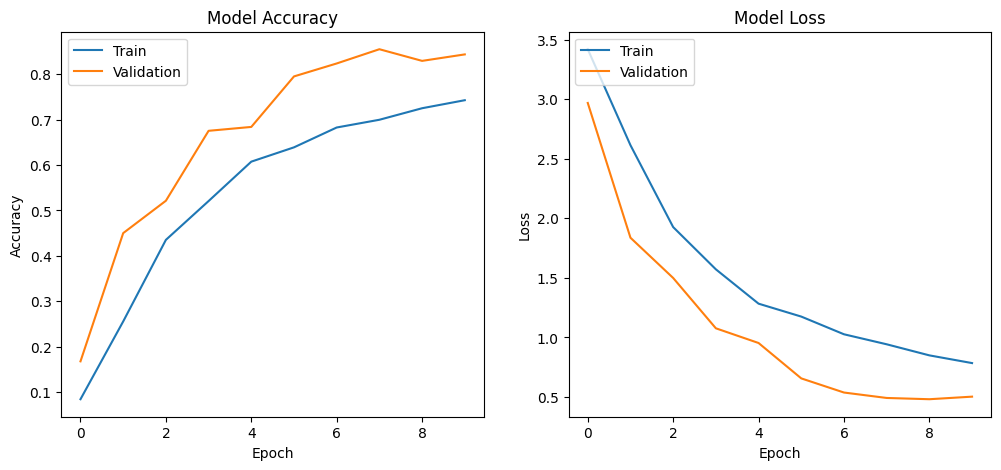

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


#Testing Xception Model

In [12]:
from keras.applications.xception import Xception
xcept_input = Input(shape=(229,229,3))
xcept_model = Xception(include_top=False, input_tensor=xcept_input)
xcept_model.trainable=True

In [13]:
xcept_output = xcept_model.output
xcept_x = Flatten()(xcept_output)
xcept_x = Dense(units = 256, activation='relu')(xcept_x)
xcept_x = Dense(units = 128, activation='relu')(xcept_x)
xcept_x = Dense(units = 36, activation='softmax')(xcept_x)
xcept_model = keras.models.Model(inputs=xcept_input, outputs=xcept_x)

In [14]:
xcept_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [15]:
xcept_hist = xcept_model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - 221s 2s/step - loss: 1.8735 - accuracy: 0.5018 - val_loss: 0.6498 - val_accuracy: 0.7949
Epoch 2/10
98/98 [==============================] - 168s 2s/step - loss: 0.7399 - accuracy: 0.7740 - val_loss: 0.3692 - val_accuracy: 0.8661
Epoch 3/10
98/98 [==============================] - 166s 2s/step - loss: 0.5053 - accuracy: 0.8376 - val_loss: 0.2619 - val_accuracy: 0.9202
Epoch 4/10
98/98 [==============================] - 169s 2s/step - loss: 0.3827 - accuracy: 0.8758 - val_loss: 0.1807 - val_accuracy: 0.9487
Epoch 5/10
98/98 [==============================] - 166s 2s/step - loss: 0.3022 - accuracy: 0.8970 - val_loss: 0.1911 - val_accuracy: 0.9402
Epoch 6/10
98/98 [==============================] - 166s 2s/step - loss: 0.2437 - accuracy: 0.9242 - val_loss: 0.1781 - val_accuracy: 0.9373
Epoch 7/10
98/98 [==============================] - 163s 2s/step - loss: 0.1837 - accuracy: 0.9358 - val_loss: 0.1596 - val_accuracy: 0.9459
Epoch 8/10
98/98 [======

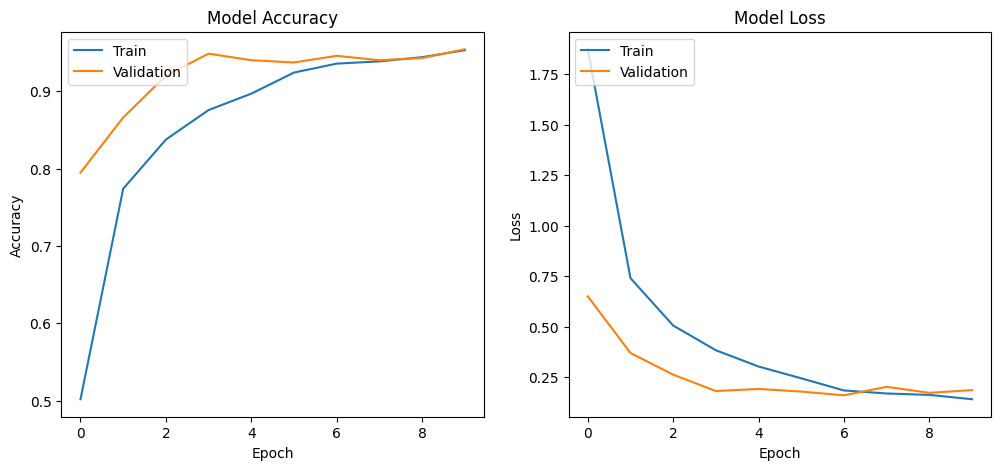

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(xcept_hist.history['accuracy'])
plt.plot(xcept_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(xcept_hist.history['loss'])
plt.plot(xcept_hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
